In [1]:
# Task 2 - Credit Card Fraud detection
# Task 3 - Customer Churn Prediction
# Task 4 - Spam SMS Detection

# <h><center><b>**CodSoft Internship Program**</b></center></h>
### <h><center><b>**TASK 3 - Customer Churn Prediction**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/CodSoft_Customer_Churn_Prediction**

<h1><b>Customer Churn Prediction Model</b></h1>

![](https://miro.medium.com/v2/resize:fit:1024/1*WZdoYPpmiIk1AcPQ1YHWug.png)
# **Guess what makes your customer unhappy with your products/services!!**
### **Kingdom without King & his Subjects and a Shop without Shopkeeper & its Customers sounds similar!!**

# **Introduction**

Customer churn prediction is a key application of data science and machine learning that helps businesses identify customers who are likely to leave. By analyzing past customer behavior, transaction patterns, and engagement metrics, companies can proactively take measures to retain valuable customers.

Machine learning has significantly enhanced Customer Churn Prediction by automating data processing and improving accuracy through statistical algorithms. Additionally, feature engineering—such as computing mean values for missing data—plays a crucial role in refining predictive accuracy.

Here, we have simply trained the model with some previous historical data and also checked the model's accuracy. We have used four different algorithms Logistic Regression, Decision Tree Classifier, Random Forest Classifier to train the model. Out of three algorithms, the best algorithm, that is whose accuracy is maximum, is used for predicting new data. So, there is an obvious 80% chance that it will provide the accurate result.

# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- Importing the csv file.
- Data Description.
- Data Processing
- i) Data Processing - Finding and filling Missing Values
- ii) Data Processing - Droping all unnecessary features
- iii) Data Processing - One-Hot Encoding
- Feature Scaling
- Prepare the Dataset for ML Training
- Model 1: Logistic Regression
- Model 2: Decision Tree Classifier
- Model 3: Random Forest Classifier
- Evaluate the Best Model (Performance Evaluation)
- Encoded values: Make Predictions on New Data (1)
- Original values: Make Predictions on New Data (2)
- Summary

# Installing and importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Importing the CSV file

In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Description

**Here are the complete names of the columns of churn modelling dataset:**

- `RowNumber` – A sequential index for each record.
- `CustomerId` – Unique identifier for each customer.
- `Surname` – Customer's last name (may not be useful for analysis).
- `CreditScore` – A numerical score representing creditworthiness.
- `Geography` – The country where the customer resides.
- `Gender` – Customer's gender (may influence purchasing behavior).
- `Age` – Customer's age, relevant for behavior analysis.
- `Tenure` – How long the customer has had an account with the company.
- `Balance` – The current balance in the customer’s account.
- `NumOfProducts` – Number of financial products the customer holds.
- `HasCrCard` – Binary indicator (1 if customer has a credit card, 0 if not).
- `IsActiveMember` – Whether the customer is actively engaged with the company.
- `EstimatedSalary` – Estimated annual salary of the customer.
- `Exited` – The target variable; 1 if the customer churned (left), 0 if they stayed.


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.shape

(10000, 14)

In [11]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Data Processing

# i) Data Processing - Finding and filling Missing Values

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Thus, there is no missing values

# ii) Data Processing - Droping all unnecessary features

In [13]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# iii) Data Processing - One-Hot Encoding
### Purpose of One-Hot Encoding: Used for categorical variables that have no inherent order (e.g., colors, cities, product categories).

In [14]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
ohe_encoder = OneHotEncoder()

ohe_encoded = ohe_encoder.fit_transform(df[["Geography"]]).toarray()

encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())

df = pd.concat([df, encoder_df], axis = 1)

df.drop('Geography', axis=1, inplace=True)

df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0


In [16]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
ohe_encoder = OneHotEncoder()

ohe_encoded = ohe_encoder.fit_transform(df[["Gender"]]).toarray()

encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())

df = pd.concat([df, encoder_df], axis = 1)

df.drop('Gender', axis=1, inplace=True)

df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0


### Now, our dataset is ready to be trained.

# Feature Scaling
Feature Scaling is a technique used in machine learning to normalize or standardize numerical data so that features are on a similar scale.

In [18]:
# Standardizes the features by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Exited', axis=1))  
# Target variable should be excluded from scaling

In [19]:
X = pd.DataFrame(scaled_features, columns=df.drop(columns=["Exited"]).columns)  # X: Independent variable
y = df["Exited"]   # y: Dependent variable

# Prepare the Dataset for ML Training
Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [20]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(10000, 14)
(8000, 13)
(2000, 13)


# **Model 1: Logistic Regression**

In [22]:
# Model Training: Here, we are training the model with X_train and y_train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predicting the trained-model on X_test to get the predicted values of y.
logistic_y_preds = log_model.predict(X_test)

In [24]:
# Logistic accuracy score: checking whether predicted values of y is equal to Actual values of y.
log_accuracy = accuracy_score(y_test, logistic_y_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.81


### Accuracy: 0.81 means there is 81% match between Actual values of y and Predicted values of y.

In [25]:
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, logistic_y_preds))

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [26]:
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_y_preds))

Confusion Matrix:
 [[1543   64]
 [ 314   79]]


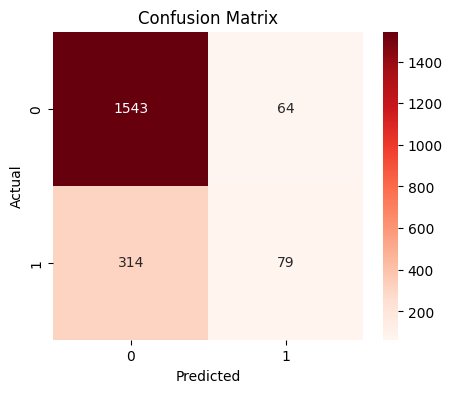

In [27]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, logistic_y_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
################### GridSearchCV ###################

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization method
    'penalty': ['l1', 'l2']  # Regularization type (if solver supports it)
}

# Initialize Logistic Regression
log_model = LogisticRegression(max_iter=500)

# Perform Grid Search
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.8106249999999999


In [29]:
################### RandomizedSearchCV ###################

import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Explore more regularization strengths
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize Logistic Regression
log_model = LogisticRegression(max_iter=500)

# Perform Random Search
random_search = RandomizedSearchCV(log_model, param_grid, cv=5, n_iter=50, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Display best parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(0.08858667904100823)}
Best Accuracy: 0.8106250000000002


In [30]:
################### optuna ###################

import optuna

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e4)  # Log-uniform search space
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])
    
    model = LogisticRegression(C=C, solver=solver, max_iter=500)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)  # Accuracy score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Runs 50 optimization trials

print("Best Parameters:", study.best_params)
print("Best Score:", study.best_value)  # Best optimization score
print("Best Trial:", study.best_trial)  # Full details of the best trial

[I 2025-05-11 16:20:43,424] A new study created in memory with name: no-name-691680a5-938d-4f24-b178-b33efcfa5131
[I 2025-05-11 16:20:43,472] Trial 0 finished with value: 0.811 and parameters: {'C': 4.450750214513419, 'solver': 'liblinear'}. Best is trial 0 with value: 0.811.
[I 2025-05-11 16:20:43,597] Trial 1 finished with value: 0.811 and parameters: {'C': 58.04227580873941, 'solver': 'saga'}. Best is trial 0 with value: 0.811.
[I 2025-05-11 16:20:43,626] Trial 2 finished with value: 0.811 and parameters: {'C': 22.56907090826841, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.811.
[I 2025-05-11 16:20:43,731] Trial 3 finished with value: 0.811 and parameters: {'C': 0.16878362702585673, 'solver': 'saga'}. Best is trial 0 with value: 0.811.
[I 2025-05-11 16:20:43,757] Trial 4 finished with value: 0.811 and parameters: {'C': 25.489460367159587, 'solver': 'liblinear'}. Best is trial 0 with value: 0.811.
[I 2025-05-11 16:20:43,774] Trial 5 finished with value: 0.811 and parameters: {'C

Best Parameters: {'C': 0.005171362514138104, 'solver': 'lbfgs'}
Best Score: 0.817
Best Trial: FrozenTrial(number=35, state=TrialState.COMPLETE, values=[0.817], datetime_start=datetime.datetime(2025, 5, 11, 16, 20, 45, 164600), datetime_complete=datetime.datetime(2025, 5, 11, 16, 20, 45, 193031), params={'C': 0.005171362514138104, 'solver': 'lbfgs'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=10000.0, log=True, low=0.0001, step=None), 'solver': CategoricalDistribution(choices=('liblinear', 'lbfgs', 'saga'))}, trial_id=35, value=None)


# **Model 2: Decision Tree Classifier**

In [31]:
# Model Training: Here, we are training the model with X_train and y_train
Decision_Tree_model = DecisionTreeClassifier(random_state=42)
Decision_Tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Predicting the trained-model on X_test to get the predicted values of y.
Decision_Tree_y_preds = Decision_Tree_model.predict(X_test)

In [33]:
# Decision_Tree accuracy score: checking whether predicted values of y is equal to Actual values of y.
Decision_Tree_accuracy = accuracy_score(y_test, Decision_Tree_y_preds)
print(f"Decision_Tree Accuracy: {Decision_Tree_accuracy:.2f}")

Decision_Tree Accuracy: 0.78


### Accuracy: 0.78 means there is 78% match between Actual values of y and Predicted values of y.

In [34]:
print("Classification Report of Decision Tree:")
print(classification_report(y_test, Decision_Tree_y_preds))

Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, Decision_Tree_y_preds))

Confusion Matrix:
 [[1359  248]
 [ 193  200]]


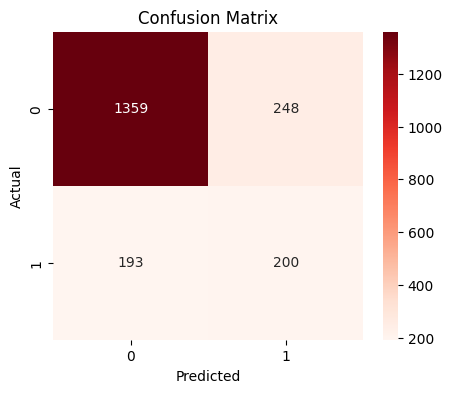

In [36]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, Decision_Tree_y_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

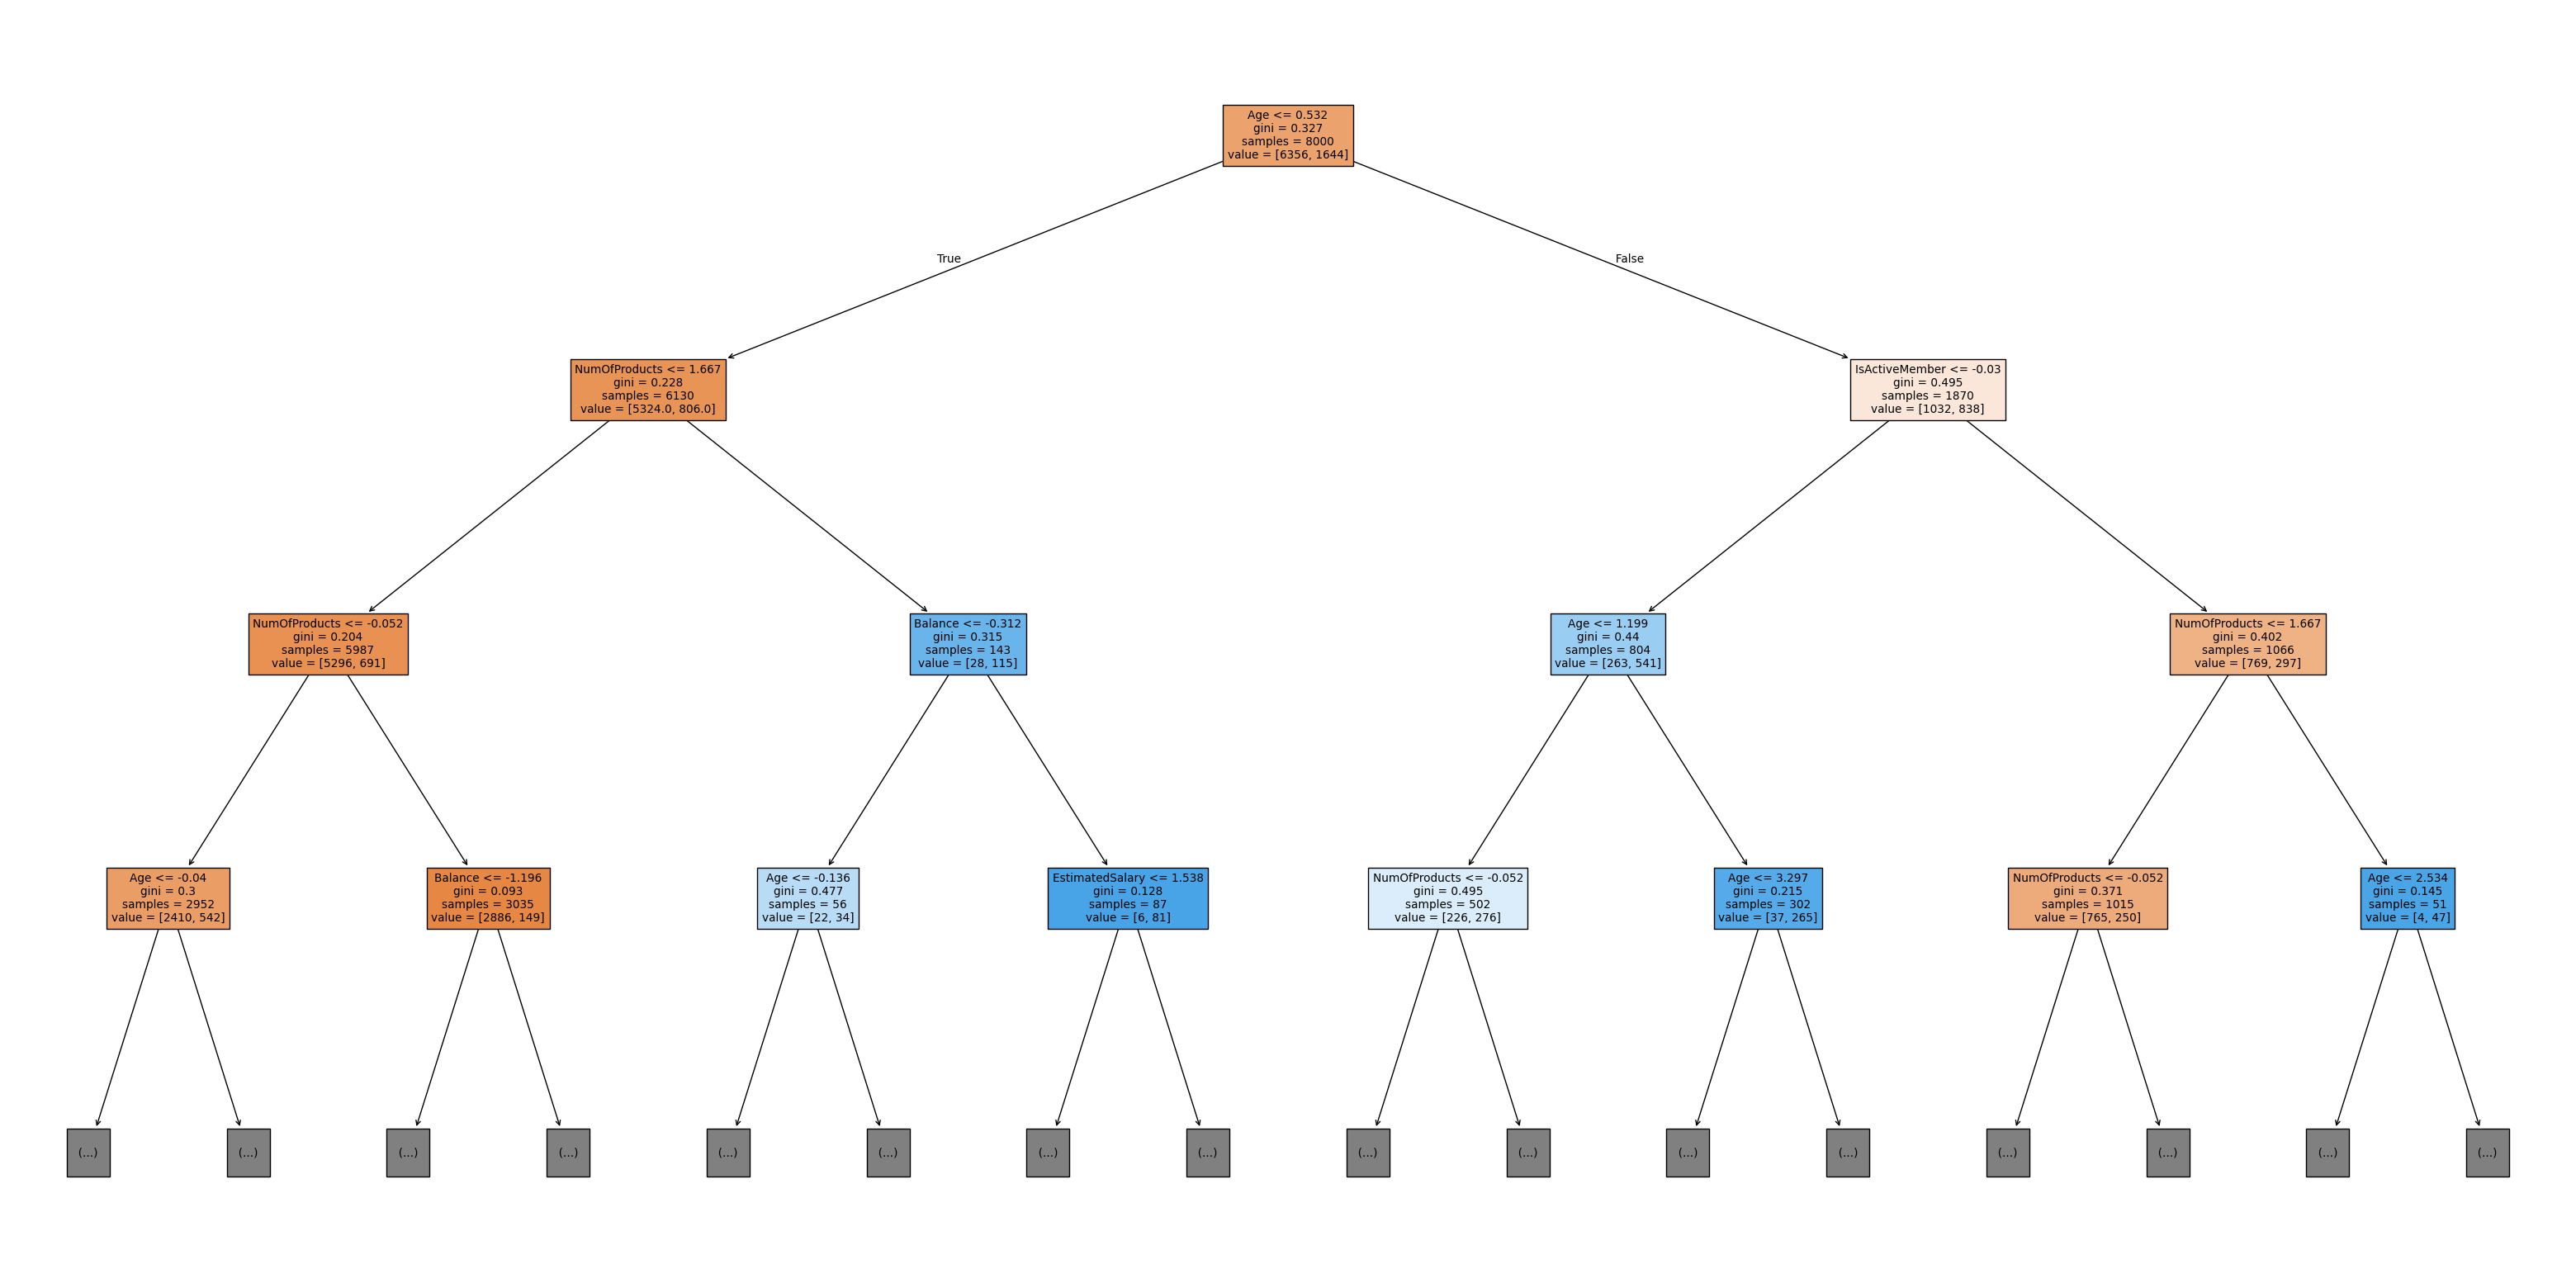

In [37]:
# Visualising the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(Decision_Tree_model, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

# **Model 3: Random Forest Classifier**

In [38]:
# Model Training: Here, we are training the model with X_train and y_train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predicting the trained-model on X_test to get the predicted values of y.
rf_y_preds = rf_model.predict(X_test)

In [40]:
# Random Forest accuracy score: checking whether predicted values of y is equal to Actual values of y.
rf_accuracy = accuracy_score(y_test, rf_y_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.86


### Accuracy: 0.86 means there is 86% match between Actual values of y and Predicted values of y.

In [41]:
print("Classification Report of Random Forest:")
print(classification_report(y_test, rf_y_preds))

Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [42]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_preds))

Confusion Matrix:
 [[1545   62]
 [ 210  183]]


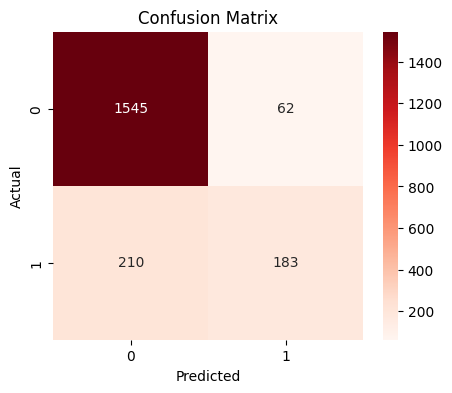

In [43]:
# Visualize Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_y_preds), annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the Best Model (Performance Evaluation)

In [44]:
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []

In [45]:
# Logistic Regression

accuracy_list.append(accuracy_score(y_test, logistic_y_preds))
precision_list.append(precision_score(y_test, logistic_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, logistic_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, logistic_y_preds, average='weighted'))

In [46]:
# Decision Tree

accuracy_list.append(accuracy_score(y_test, Decision_Tree_y_preds))
precision_list.append(precision_score(y_test, Decision_Tree_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, Decision_Tree_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, Decision_Tree_y_preds, average='weighted'))

In [47]:
# Random Forest

accuracy_list.append(accuracy_score(y_test, rf_y_preds))
precision_list.append(precision_score(y_test, rf_y_preds, average='weighted'))
recall_list.append(recall_score(y_test, rf_y_preds, average='weighted'))
f1_score_list.append(f1_score(y_test, rf_y_preds, average='weighted'))

In [48]:
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_score_list)

[0.811, 0.7795, 0.864]
[0.7761921853052709, 0.7913034333578792, 0.8541281702424559]
[0.811, 0.7795, 0.864]
[0.77374365757816, 0.7847906507989741, 0.8512191616051799]


In [49]:
labels = ['Logistic Reg', 'Decision Tree', 'Random Forest']

Text(0.5, 1.0, 'F1 Score')

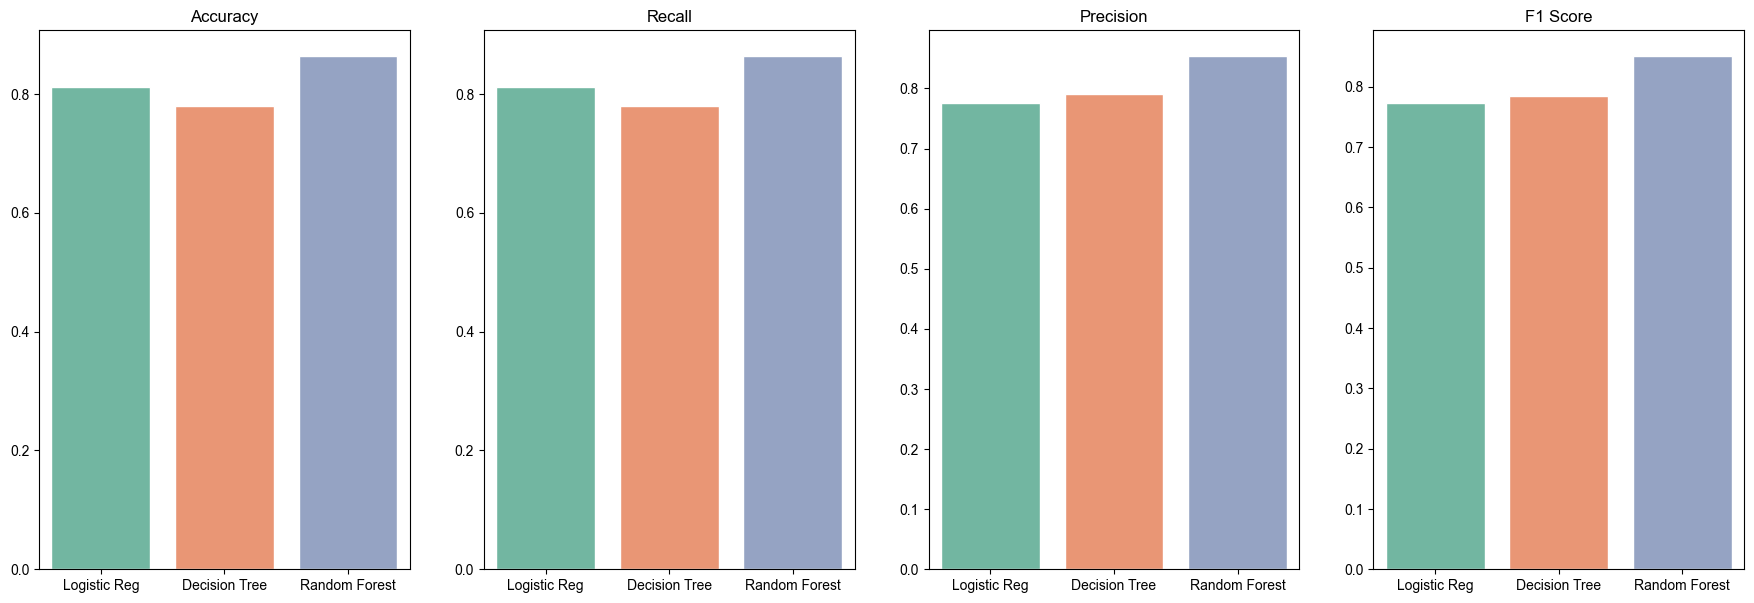

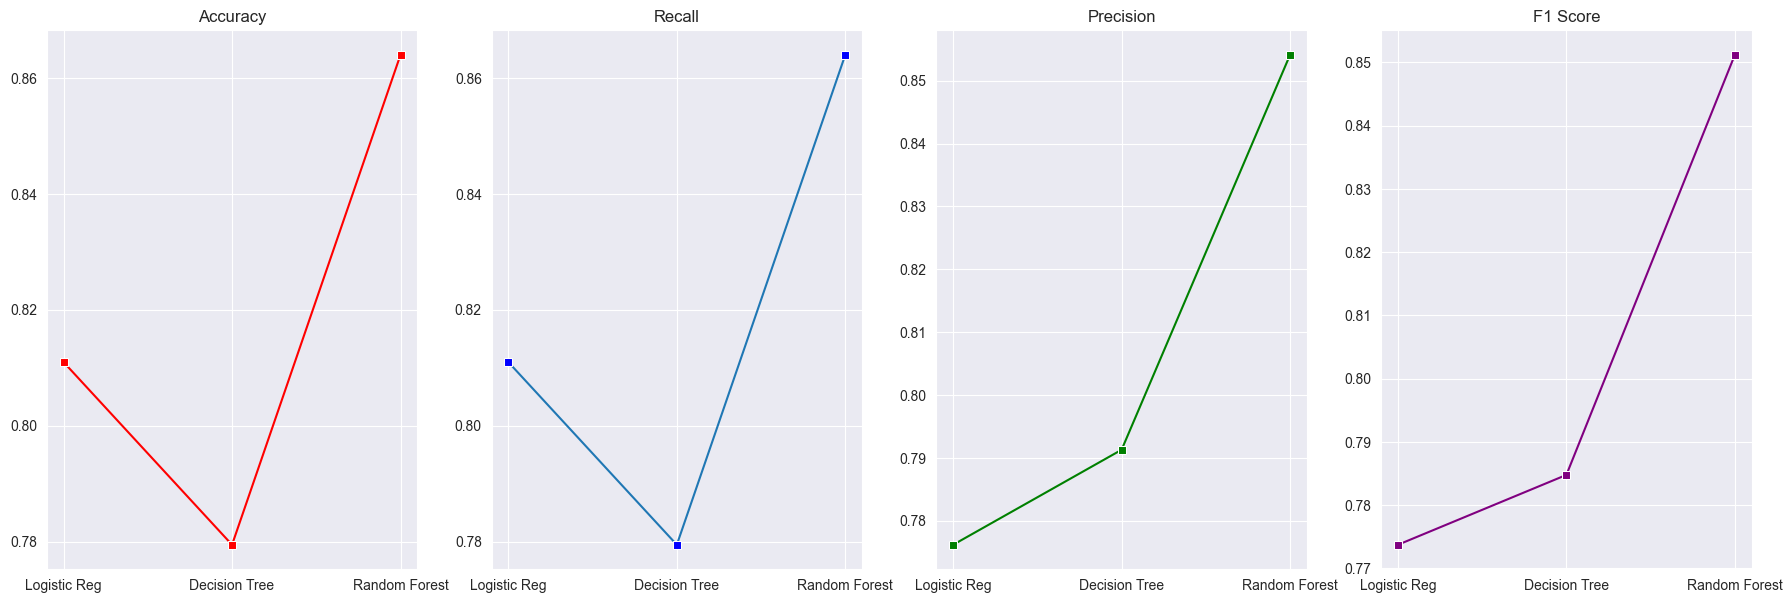

In [50]:
fig, ax = plt.subplots(1, 4, figsize = (22, 7))
sns.set_style('darkgrid')
sns.barplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0]).set_title("Accuracy")
sns.barplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1]).set_title("Recall")
sns.barplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2]).set_title("Precision")
sns.barplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3]).set_title("F1 Score")

fig, ax = plt.subplots(1, 4, figsize=(22, 7))
sns.set_style('darkgrid')
sns.lineplot(x = labels, y = accuracy_list, palette = 'Set2', ax = ax[0], marker = 's', color = 'red').set_title("Accuracy")
sns.lineplot(x = labels, y = recall_list, palette = 'Set2', ax = ax[1], marker = 's', markerfacecolor = 'blue').set_title("Recall")
sns.lineplot(x = labels, y = precision_list, palette = 'Set2', ax = ax[2], marker = 's', color = 'green').set_title("Precision")
sns.lineplot(x = labels, y = f1_score_list, palette = 'Set2', ax = ax[3], marker = 's', color = 'purple').set_title("F1 Score")

### *In conclusion, the analysis of customer churn analysis using machine learning algorithms, specifically Logistic Regression, Random Forest, and Decision Tree, has provided valuable insights into their performance. Through rigorous evaluation and comparison, it is evident that Random Forest emerges as the most effective algorithm among the three for customer churn analysis*

## **1. Make Predictions on New Data (Encoded values)**
### The Data that `You` will have to enter to predict `whether your customer will hold-on or leave` availing your product.!!

In [51]:
new_dataframe = pd.DataFrame({
    'CreditScore': [619],
    'Age': [42],
    'Tenure': [2],
    'Balance': [0],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [101348.88],
    'Geography_France': [1],
    'Geography_Germany': [0],
    'Geography_Spain': [0],
    'Gender_Female': [1],
    'Gender_Male': [0]
})
new_dataframe.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348.88,1,0,0,1,0


In [52]:
# Standardize the feature set (excluding the target variable)
scaled_new_data = scaler.transform(new_dataframe)

# Make predictions
prediction = log_model.predict(scaled_new_data)
print("No!! the customer is not churned (not left)" if prediction == 0
      else "Yes!! The customer is churned (left)")

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## **2. Make Predictions on New Data (Original values)**
### The Data that `You` will have to enter to predict `whether your customer will hold-on or leave` availing your product.!!

In [ ]:
new_dataframe = pd.DataFrame({
    'RowNumber': [1],
    'CustomerId': [15634602],
    'Surname': ["Hargrave"],
    'CreditScore': [619],
    'Geography': ["France"],
    'Gender': ["Female"],
    'Age': [42],
    'Tenure': [2],
    'Balance': [0],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [101348.88]
})
new_dataframe.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88


In [ ]:
new_dataframe.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
new_dataframe.head(2)

ohe_encoder = OneHotEncoder()
ohe_encoded = ohe_encoder.fit_transform(new_dataframe[["Gender"]]).toarray()
encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())
new_dataframe = pd.concat([new_dataframe, encoder_df], axis = 1)
new_dataframe.drop('Gender', axis=1, inplace=True)

ohe_encoder = OneHotEncoder()
ohe_encoded = ohe_encoder.fit_transform(new_dataframe[["Geography"]]).toarray()
encoder_df = pd.DataFrame(ohe_encoded, columns = ohe_encoder.get_feature_names_out())
new_dataframe = pd.concat([new_dataframe, encoder_df], axis = 1)
new_dataframe.drop('Geography', axis=1, inplace=True)

new_dataframe.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Geography_France
0,619,42,2,0,1,1,1,101348.88,1.0,1.0


In [ ]:
# Check if the X_train and new_data columns are in same order
print("Expected Features:", X_train.columns)
print("New Data Features:", new_dataframe.columns)

Expected Features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')
New Data Features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Geography_France'],
      dtype='object')


In [ ]:
# Ensure new_data contains the same one-hot encoded columns as training data
missing_cols = [col for col in X_train.columns if col not in new_dataframe.columns]

# Add missing columns with default value 0 (since new_data doesn't have "60 months")
for col in missing_cols:
    new_dataframe[col] = 0

# Reorder columns to match training set
new_dataframe = new_dataframe[X_train.columns]

# Check if the X_train and new_data columns are in same order
print("Expected Features:", X_train.columns)
print("New Data Features:", new_dataframe.columns)

Expected Features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')
New Data Features: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [ ]:
# Standardize the feature set (excluding the target variable)
scaled_new_data = scaler.transform(new_dataframe)

# Make predictions
prediction = log_model.predict(scaled_new_data)
print("No!! the customer is not churned (not left)" if prediction == 0
      else "Yes!! The customer is churned (left)")

No!! the customer is not churned (not left)


# **Summary**

We downloaded, explored, observed for any missing values and trained few models to search the best model out of it and used that perticular model/algorithm for Customer Churn Prediction.

- Total Dataset contains 10000 rows and 14 columns.
- Performed Exploratory Data Analysis.
- Normalized the entire Data.
- Then split the data into train data and test data.
- Training data had approximately 8000 rows and 14 columns.
- Test data had approximately 2000 rows and 14 columns.
- Trained the model to perform the required Application of predicting Customer Churn correctly.
- Trained four models:
`LogisticRegression`, `DecisionTree` and `RandomForest`.
Among these performance of `RandomForest` was best as it gave the accuracy of 89% on the dataset.

### **Now you can also predict Customer Churn just by providing few Informations 😊**

## **THANK YOU 😊**